# Classification: RVM vs SVM

In [6]:
# import necessary functions & classes
import os
os.chdir("/Users/amazaspshaumyan/Desktop/Bayesian Regression Methods/Relevance Vector Machine & ARD")
from rvm import SparseBayesianLearner
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Synthetic Example, Moons

SVM misclassification rate on test set is 0.1075,with 147 support vectors

RVM misclassification rate on test set is 0.105,with 44 relevant vectors



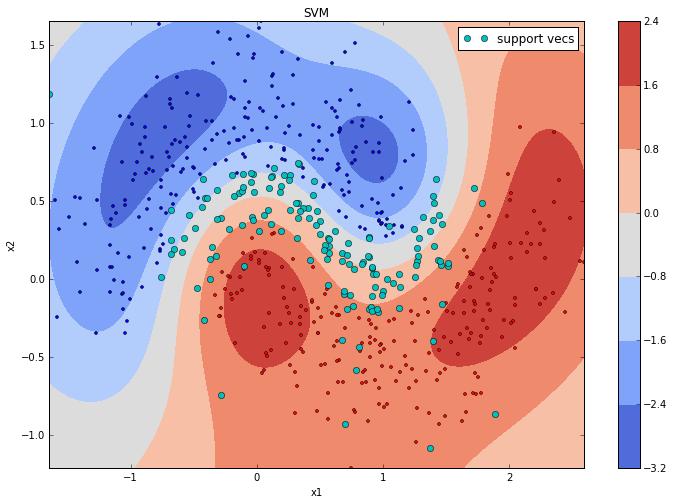

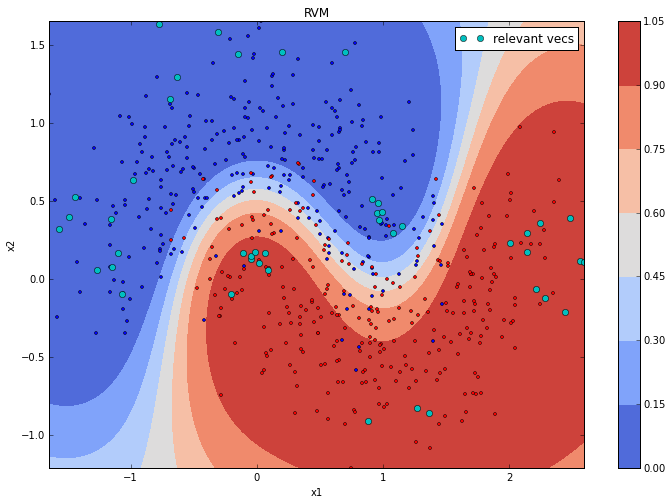

In [8]:
# number of samples
n = 1000
test_proportion = 0.4

# create dataset & split into train/test parts
Xx,Yy   = make_moons(n_samples = n, noise = 0.3, random_state = 1)
X,x,Y,y = train_test_split(Xx,Yy,test_size = test_proportion, 
                                 random_state = 1)

# train rvm with fixed-point optimization
rvm = SparseBayesianLearner(learn_type = "classification", 
                            method     = "fixed-point",
                            alpha_max  = 10,
                            kernel     = "gaussian",
                            scaler     = 1)
rvm.fit(X,Y)


# train svm (and find best parameters through cross-validation)
svc = GridSearchCV(SVC(), param_grid = {"C":np.logspace(-3,3,9),
                                        "gamma": np.logspace(-3,3,7)})
svc.fit(X,Y)

# errors on test set & sparsity
svm_error = np.sum(y!=svc.predict(x)) / (n * test_proportion)
rvm_error = np.sum(y!=rvm.predict(x)) / (n * test_proportion)
svecs = svc.best_estimator_.support_vectors_.shape[0]
rvecs = np.sum(rvm.active)
svm_message = "SVM misclassification rate on test set is {0},with {1} support vectors\n"
rvm_message = "RVM misclassification rate on test set is {0},with {1} relevant vectors\n"
print svm_message.format(svm_error, svecs)
print rvm_message.format(rvm_error, rvecs)


# show decision boundaries & 

# create grid
n_grid = 500
max_x      = np.max(X,axis = 0)
min_x      = np.min(X,axis = 0)
X1         = np.linspace(min_x[0],max_x[0],n_grid)
X2         = np.linspace(min_x[1],max_x[1],n_grid)
x1,x2      = np.meshgrid(X1,X2)
Xgrid      = np.zeros([n_grid**2,2])
Xgrid[:,0] = np.reshape(x1,(n_grid**2,))
Xgrid[:,1] = np.reshape(x2,(n_grid**2,))

sv_grid = svc.decision_function(Xgrid)
rv_grid = rvm.predictive_distribution(Xgrid)
models  = [sv_grid, rv_grid]
model_names = ["SVM","RVM"]

for model, model_name in zip(models, model_names):
    plt.figure(figsize = (12,8))
    plt.contourf(X1,X2,np.reshape(model,(n_grid,n_grid)),
                       cmap="coolwarm",
                       figsize = (10,16))
    plt.colorbar()
    plt.plot(X[Y==0,0],X[Y==0,1],"bo", markersize = 3)
    plt.plot(X[Y==1,0],X[Y==1,1],"ro", markersize = 3)
    # plot 'support' or 'relevant' vectors
    svrv = None
    point_label = None
    if model_name == "SVM":
        svrv = svc.best_estimator_.support_vectors_
        point_label = "support vecs"
    else:
        svrv = rvm.Xraw[rvm.active[1:],:]
        point_label = "relevant vecs"
    plt.plot(svrv[:,0],svrv[:,1],'co',markersize=6,label=point_label)
    plt.plot()
    title = model_name
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.show()



